In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import t, norm
from scipy import stats as st

In [2]:
df = pd.read_csv('tinkoff_chashback.csv')
df

,client_id,cb_merch_last_3_month,cb_bank_last_3_month,cb_merch_before,cb_bank_before,cnt_communication,cnt_activation,cnt_view,Air,Beauty shop,...,Fastfood_before,Fuel_before,House_before,Jewelry_before,Other_before,Pet shop_before,Pharmacies_before,Supermarkets_before,Taxi_before,Transport_before
0,162353149,282.0,141.0,119.0,125.0,6,229,606,0.0,109.0,...,498.0,157.0,2621.0,31.0,6232.0,0.0,91.0,5356.0,0.0,119.0
1,666605735,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,2.0
2,558610079,0.0,0.0,0.0,0.0,0,51,77,2585.0,0.0,...,527.0,398.0,788.0,0.0,9797.0,0.0,1.0,371.0,0.0,458.0
3,769974329,174.0,0.0,151.0,102.0,3,137,375,0.0,0.0,...,227.0,0.0,0.0,0.0,208.0,0.0,14.0,338.0,0.0,10.0
4,350605405,0.0,0.0,179.0,179.0,4,18,24,0.0,634.0,...,452.0,372.0,0.0,76.0,486.0,0.0,499.0,2198.0,0.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,377949465,0.0,0.0,1275.0,1280.0,3,136,335,0.0,0.0,...,215.0,584.0,59.0,0.0,681.0,0.0,459.0,1034.0,0.0,0.0
49996,299560244,131.0,0.0,2.0,3.0,1,32,65,0.0,0.0,...,9.0,351.0,4.0,25.0,572.0,35.0,50.0,949.0,0.0,0.0
49997,66958117,448.0,0.0,0.0,0.0,1,209,507,14.0,0.0,...,80.0,26.0,0.0,0.0,423.0,0.0,22.0,1006.0,0.0,112.0
49998,549553108,0.0,0.0,244.0,244.0,3,14,21,0.0,66.0,...,653.0,34.0,6.0,0.0,5476.0,15.0,154.0,3715.0,0.0,155.0


## Предобработка

In [3]:
#Приведем заголовки к нормальному виду
df.columns = df.columns.str.lower()
df.columns

Index(['client_id', 'cb_merch_last_3_month', 'cb_bank_last_3_month',
       'cb_merch_before', 'cb_bank_before', 'cnt_communication',
       'cnt_activation', 'cnt_view', 'air', 'beauty shop', 'book store',
       'children', 'cinema', 'clothes', 'electronics', 'fastfood', 'fuel',
       'house', 'jewelry', 'other', 'pet shop', 'pharmacies', 'supermarkets',
       'taxi', 'transport', 'air_before', 'beauty shop_before',
       'book store_before', 'children_before', 'cinema_before',
       'clothes_before', 'electronics_before', 'fastfood_before',
       'fuel_before', 'house_before', 'jewelry_before', 'other_before',
       'pet shop_before', 'pharmacies_before', 'supermarkets_before',
       'taxi_before', 'transport_before'],
      dtype='object')

In [4]:
df.describe()

,client_id,cb_merch_last_3_month,cb_bank_last_3_month,cb_merch_before,cb_bank_before,cnt_communication,cnt_activation,cnt_view,air,beauty shop,...,fastfood_before,fuel_before,house_before,jewelry_before,other_before,pet shop_before,pharmacies_before,supermarkets_before,taxi_before,transport_before
count,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.00000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.0,50000.000000
mean,4.450470e+08,302.092180,137.422360,461.998100,298.724980,1.719560,112.001180,333.480180,249.180040,96.616780,...,541.092460,282.980680,309.40572,53.426900,3.257744e+03,42.281880,166.712220,1775.399180,0.0,236.119320
std,2.379750e+08,1033.182617,435.794431,1168.480323,766.625666,1.767466,104.646909,519.431044,1618.867772,494.299083,...,862.922798,639.386206,1484.67560,499.915471,9.545272e+03,530.525278,968.359001,2005.510844,0.0,546.726728
min,1.009660e+05,-31499.000000,-4950.000000,-15965.000000,-4702.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000
25%,2.545353e+08,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,45.000000,0.000000,0.000000,...,68.000000,0.000000,0.00000,0.000000,5.520000e+02,0.000000,15.000000,488.000000,0.0,9.000000
50%,3.950847e+08,0.000000,0.000000,92.000000,31.000000,1.000000,86.000000,193.000000,0.000000,0.000000,...,267.000000,24.000000,8.00000,0.000000,1.614000e+03,0.000000,72.000000,1292.000000,0.0,82.000000
75%,6.469640e+08,191.000000,50.000000,358.000000,210.000000,3.000000,176.000000,435.000000,0.000000,46.250000,...,686.250000,350.250000,146.00000,0.000000,3.695000e+03,10.000000,196.000000,2460.000000,0.0,277.000000
max,9.413153e+08,91968.000000,13731.000000,31796.000000,18656.000000,18.000000,713.000000,13462.000000,178604.000000,50237.000000,...,55280.000000,40453.000000,174890.00000,72445.000000,1.158873e+06,113618.000000,198595.000000,123265.000000,0.0,68766.000000


In [5]:
#Посмотрим информацию о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   client_id              50000 non-null  int64  
 1   cb_merch_last_3_month  50000 non-null  float64
 2   cb_bank_last_3_month   50000 non-null  float64
 3   cb_merch_before        50000 non-null  float64
 4   cb_bank_before         50000 non-null  float64
 5   cnt_communication      50000 non-null  int64  
 6   cnt_activation         50000 non-null  int64  
 7   cnt_view               50000 non-null  int64  
 8   air                    50000 non-null  float64
 9   beauty shop            50000 non-null  float64
 10  book store             50000 non-null  float64
 11  children               50000 non-null  float64
 12  cinema                 50000 non-null  float64
 13  clothes                50000 non-null  float64
 14  electronics            50000 non-null  float64
 15  fa

In [6]:
#Проверим дубликаты
df.duplicated().sum()

0

Предобработка сделана. Перейдем к выполнению заданий.

## Выполнение заданий

### Задание 1

Как взаимосвязаны коммуникации на покупки с кэшбэком?

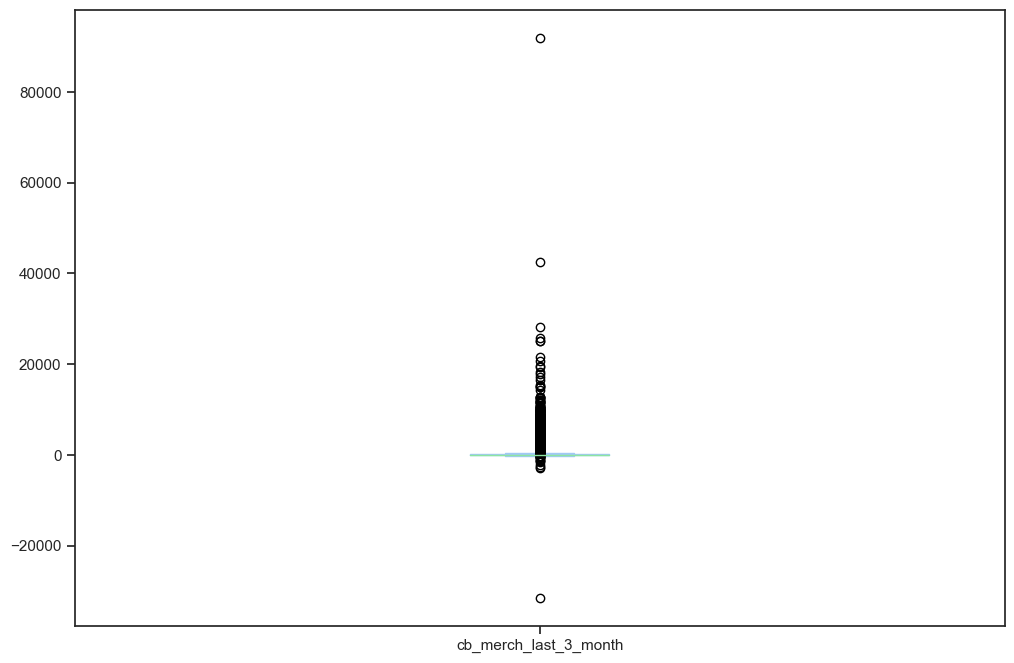

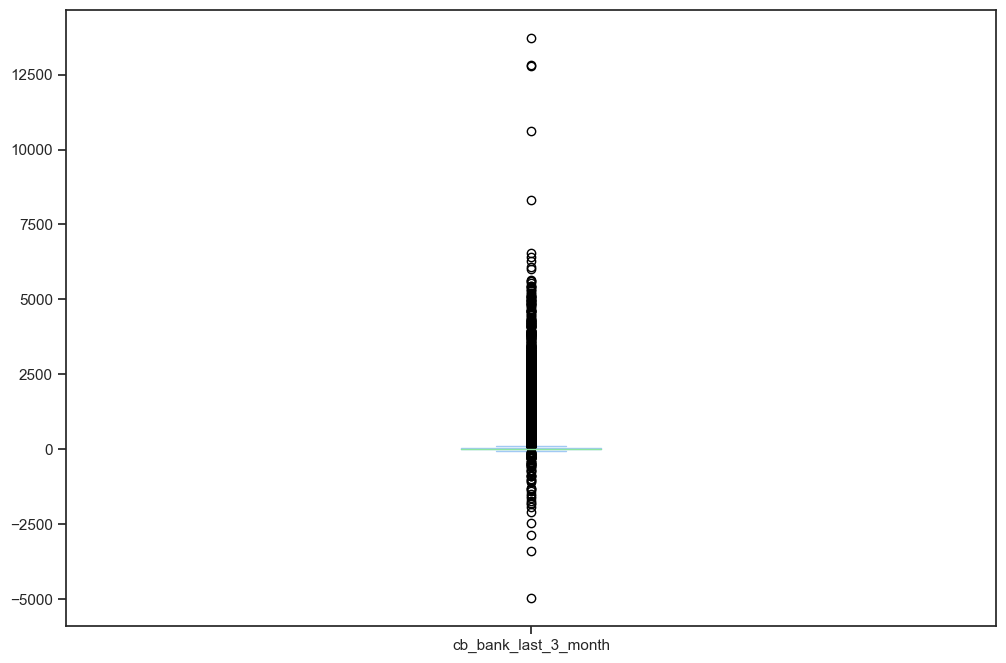

In [7]:
# Установим параметры для будущих графиков
custom_params = {"axes.spines.right": False, "axes.spines.top": False,"axes.spines.left":False}
sns.set_theme(style="ticks", palette="pastel",color_codes=True)
plt.rcParams['figure.figsize'] = (12, 8)
df['cb_merch_last_3_month'].plot(kind='box')
plt.show()
df['cb_bank_last_3_month'].plot(kind='box')
plt.show()

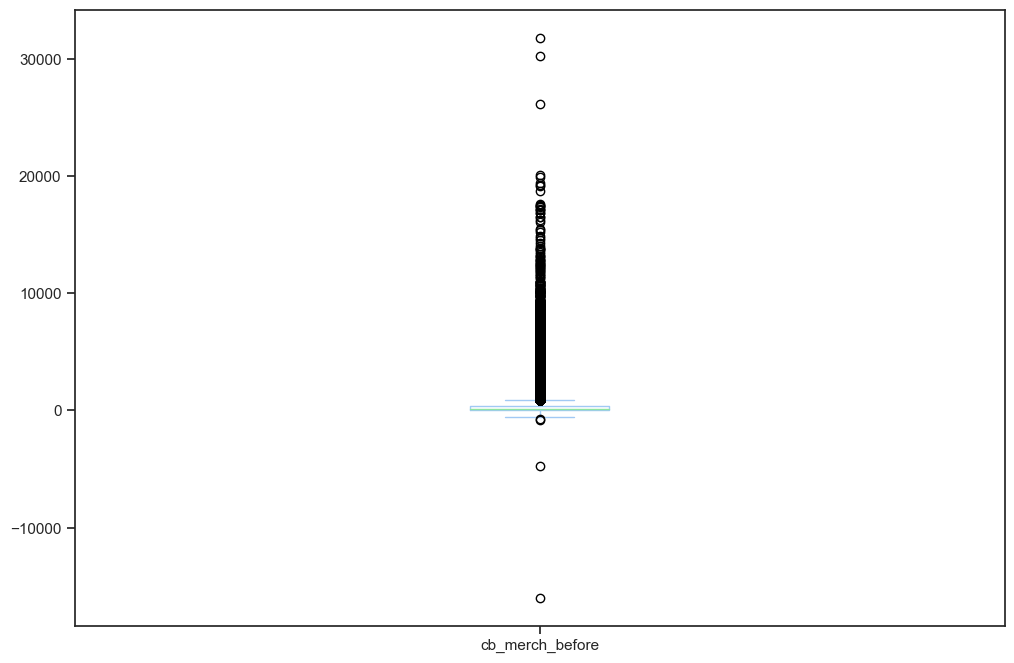

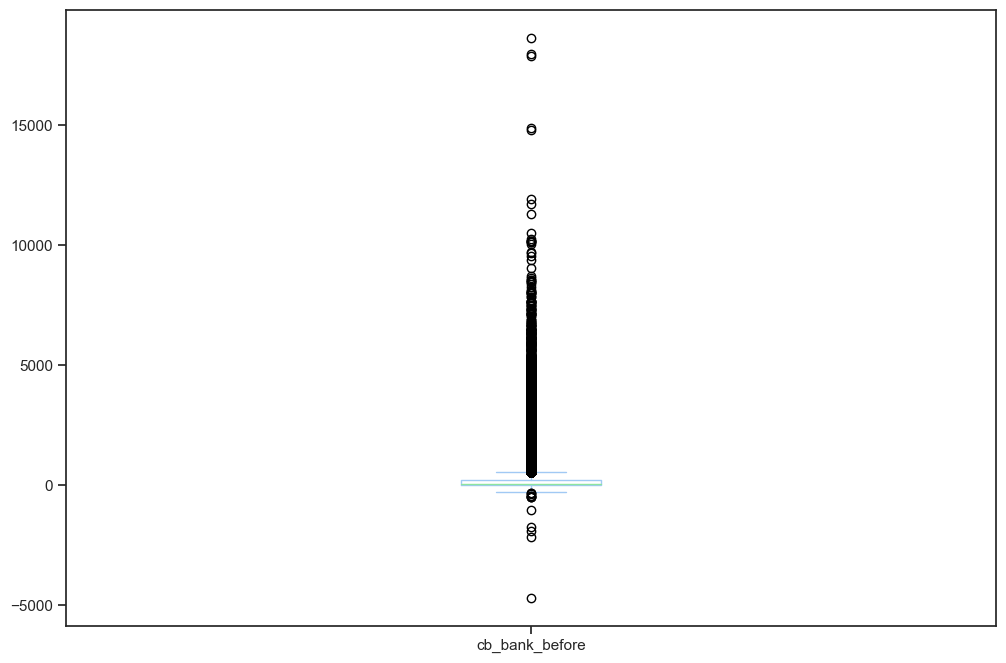

In [8]:
df['cb_merch_before'].plot(kind='box')
plt.show()
df['cb_bank_before'].plot(kind='box')
plt.show()

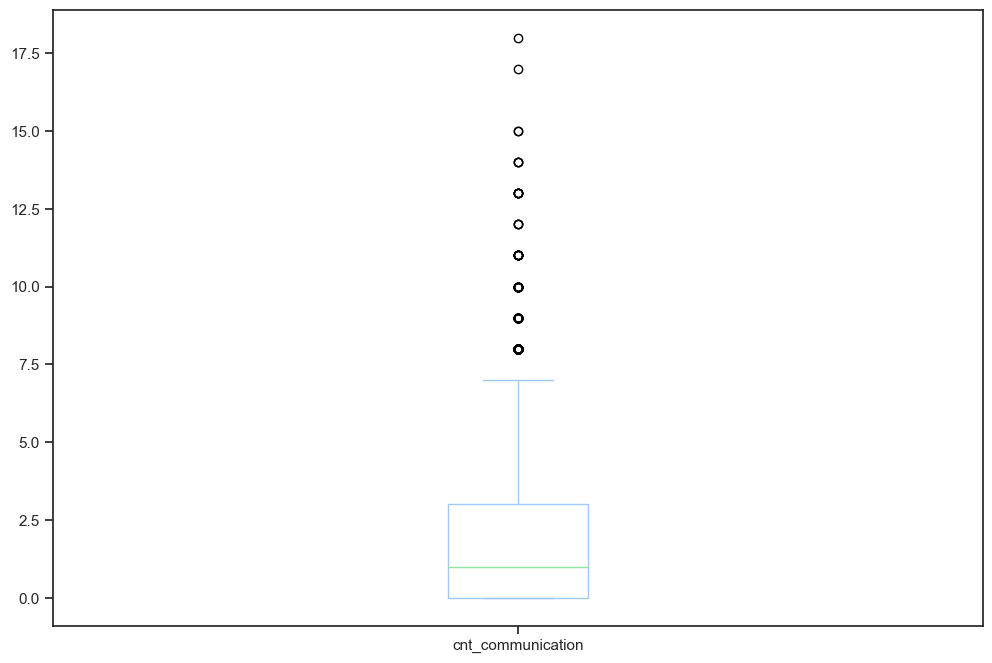

In [9]:
df['cnt_communication'].plot(kind='box')
plt.show()

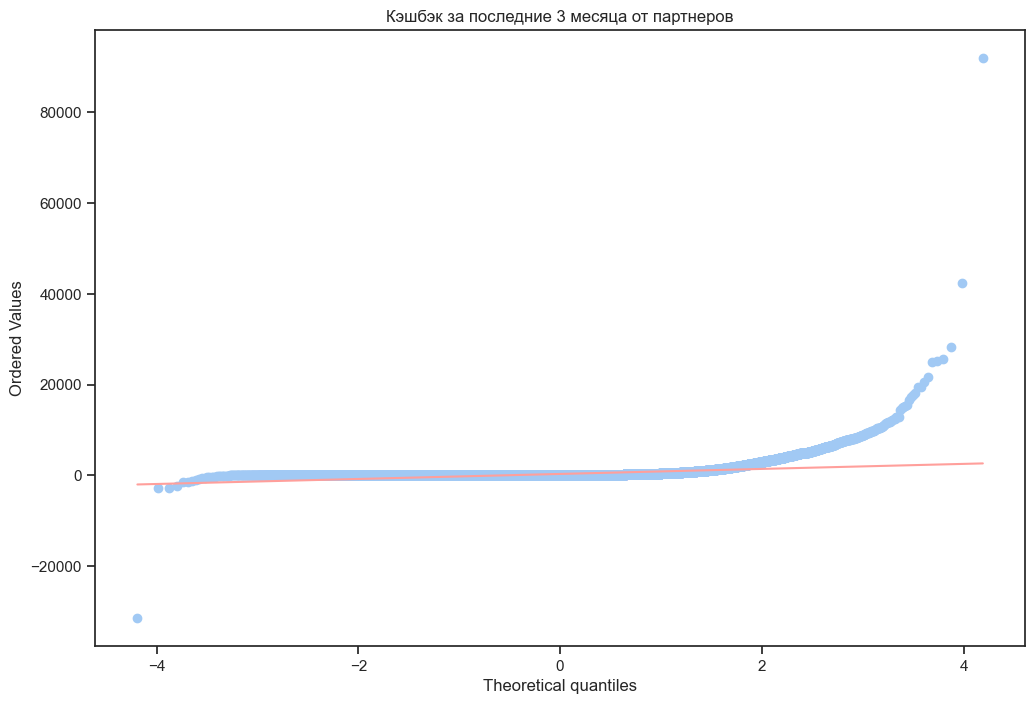

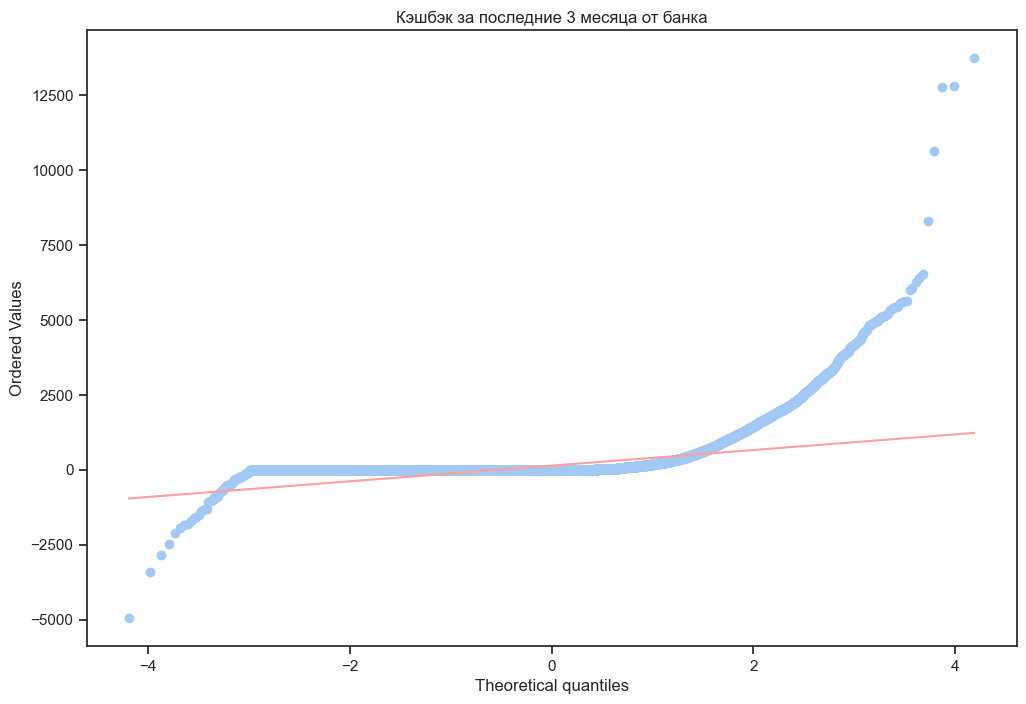

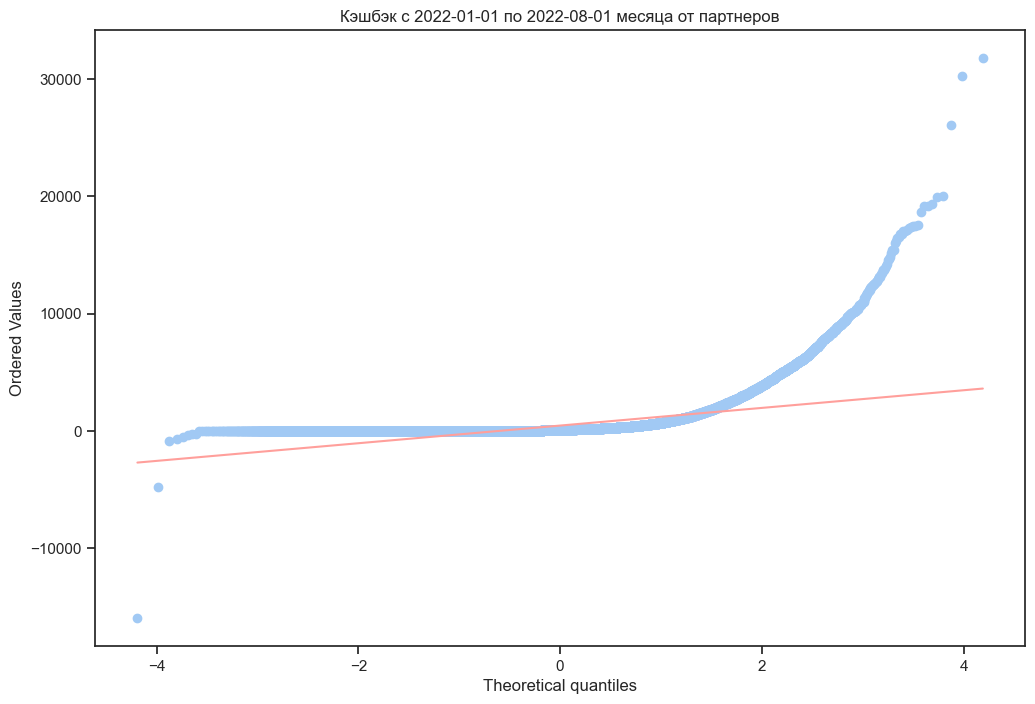

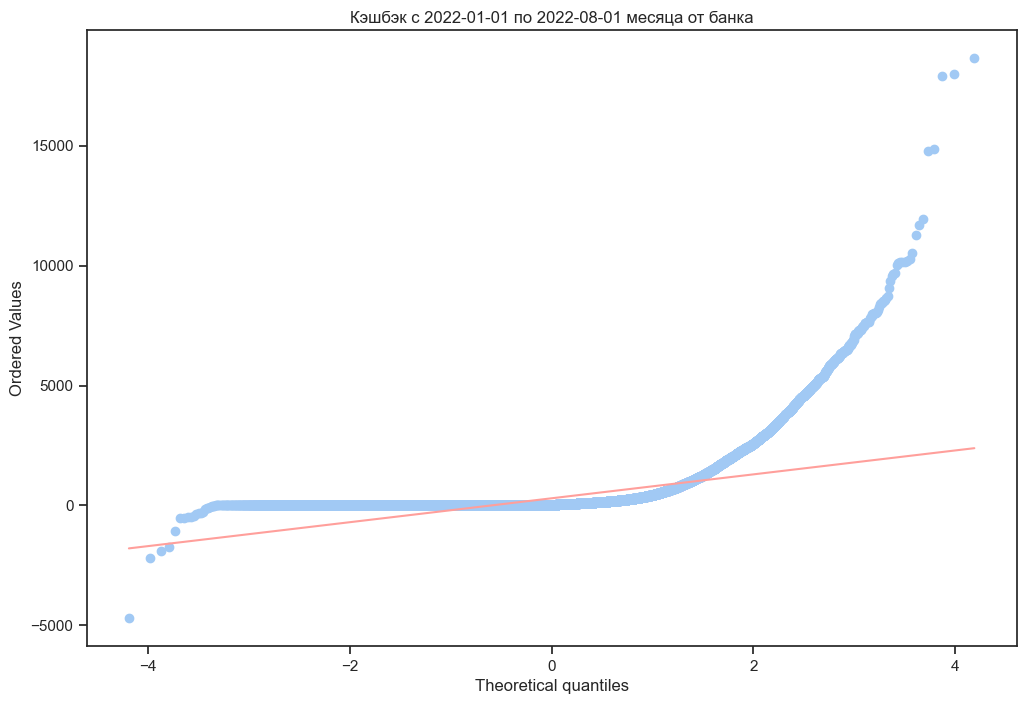

In [10]:
st.probplot(df['cb_merch_last_3_month'], dist='norm', plot=plt)
plt.title('Кэшбэк за последние 3 месяца от партнеров')
plt.show()
st.probplot(df['cb_bank_last_3_month'], dist='norm', plot=plt)
plt.title('Кэшбэк за последние 3 месяца от банка')
plt.show()
st.probplot(df['cb_merch_before'], dist='norm', plot=plt)
plt.title('Кэшбэк с 2022-01-01 по 2022-08-01 месяца от партнеров')
plt.show()
st.probplot(df['cb_bank_before'], dist='norm', plot=plt)
plt.title('Кэшбэк с 2022-01-01 по 2022-08-01 месяца от банка')
plt.show()

Построив QQ-plot, можно увидеть, что ни одно из распределений не является нормальным. Также заметно, что на концах очень достаточное количество выбросов, поэтому для корреляции больше всего подходит коэффициент Кендалла.

Как можно заметить, существует отрицательные кэшбэк. Поискав информацию в интернете, был сделан вывод, что такая ситуация возможна в случае возвращения или отмены покупки. Но может ли количество коммуникаций влиять на отрицательную сумму кэшбэка. 

In [11]:
df_copy = df.copy()
#Создадим два столбца: первые по временному признаку
df_copy['cb_last_3_month'] = df['cb_merch_last_3_month'] + df['cb_bank_last_3_month'] #Кэшбэк за последние три месяца 
df_copy['cb_before'] = df['cb_merch_before'] + df['cb_bank_before'] #Кэшбэк за первые месяцы
#Третий и четвертый по субъекту получения кэшбэка 
df_copy['cb_merch'] = df['cb_merch_last_3_month'] + df['cb_merch_before'] #Кэшбэк от партнеров за год
df_copy['cb_bank'] = df['cb_bank_last_3_month'] + df['cb_bank_before'] #Кэшбэк от банка за год

In [12]:
df_copy_1 = df_copy[['client_id', 'cb_merch_last_3_month', 'cb_bank_last_3_month', 'cb_merch_before', 'cb_bank_before', 'cb_last_3_month', 'cb_before', 'cb_merch', 'cb_bank', 'cnt_communication']]

In [13]:
df_copy_1.corr(method='kendall')

,client_id,cb_merch_last_3_month,cb_bank_last_3_month,cb_merch_before,cb_bank_before,cb_last_3_month,cb_before,cb_merch,cb_bank,cnt_communication
client_id,1.000000,0.042545,0.017499,-0.060966,-0.033635,0.036700,-0.051846,0.006317,-0.009542,0.053905
cb_merch_last_3_month,0.042545,1.000000,0.639080,0.068412,0.147653,0.913110,0.100008,0.497487,0.360247,0.137627
cb_bank_last_3_month,0.017499,0.639080,1.000000,0.140750,0.221055,0.746500,0.175177,0.398557,0.515336,0.139463
cb_merch_before,-0.060966,0.068412,0.140750,1.000000,0.565435,0.089672,0.851279,0.651838,0.454648,0.062759
cb_bank_before,-0.033635,0.147653,0.221055,0.565435,1.000000,0.174551,0.727428,0.433783,0.777430,0.080229
cb_last_3_month,0.036700,0.913110,0.746500,0.089672,0.174551,1.000000,0.126434,0.492245,0.411650,0.149588
cb_before,-0.051846,0.100008,0.175177,0.851279,0.727428,0.126434,1.000000,0.607245,0.580031,0.075011
cb_merch,0.006317,0.497487,0.398557,0.651838,0.433783,0.492245,0.607245,1.000000,0.558908,0.115036
cb_bank,-0.009542,0.360247,0.515336,0.454648,0.777430,0.411650,0.580031,0.558908,1.000000,0.114646
cnt_communication,0.053905,0.137627,0.139463,0.062759,0.080229,0.149588,0.075011,0.115036,0.114646,1.000000


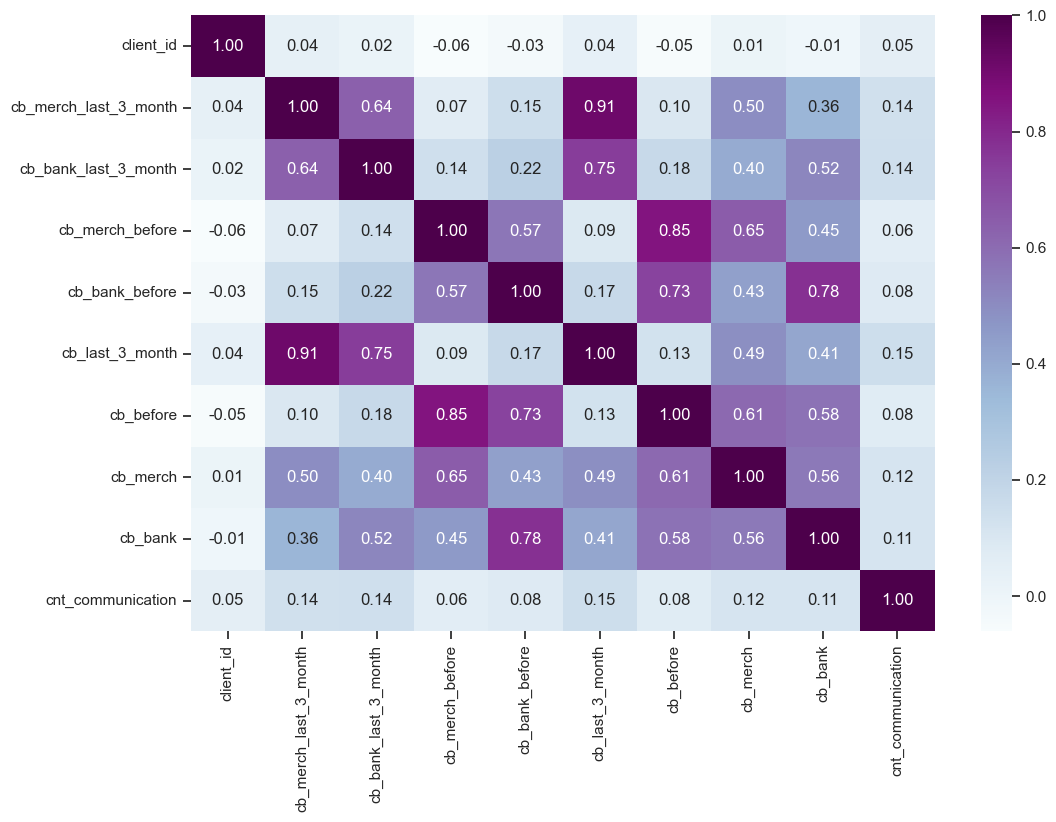

In [14]:
plt.rcParams['figure.figsize'] = (12, 8)
sns.heatmap(df_copy_1.corr(method='kendall'), annot=True, fmt=".2f", linecolor='white', cmap='BuPu')
plt.show()

На основе корреляции можем сделать вывод о том, что связь между всеми показателями и количеством коммуникаций слабая или она нелинейная. Если рассматривать суммарные показатели, то наименьший коэффициент у кэшбэка за первые месяцы, а наибольший у кэшбэка за последние три месяца. Разделение по субъекту не дало существенных различий.

### Задание 2

Как взаимосвязаны обороты клиентов и выплаченный кэшбэк?

In [15]:
#Составим таблицы с категориями по временному признаку 
df_all = df_copy.copy()
df_all = df_all.drop(['cnt_activation', 'cnt_view'], axis=1) #Убираем ненужные столбцы для удобства
df_all.corr(method='kendall') 

,client_id,cb_merch_last_3_month,cb_bank_last_3_month,cb_merch_before,cb_bank_before,cnt_communication,air,beauty shop,book store,children,...,other_before,pet shop_before,pharmacies_before,supermarkets_before,taxi_before,transport_before,cb_last_3_month,cb_before,cb_merch,cb_bank
client_id,1.000000,0.042545,0.017499,-0.060966,-0.033635,0.053905,-0.089095,-0.008836,-0.029037,-0.052566,...,-0.221976,-0.074879,-0.142309,-0.176005,NaN,-0.127402,0.036700,-0.051846,0.006317,-0.009542
cb_merch_last_3_month,0.042545,1.000000,0.639080,0.068412,0.147653,0.137627,0.065998,0.097566,0.082488,0.090269,...,0.064671,0.024303,0.041787,0.056234,NaN,0.032162,0.913110,0.100008,0.497487,0.360247
cb_bank_last_3_month,0.017499,0.639080,1.000000,0.140750,0.221055,0.139463,0.065190,0.087128,0.074141,0.090906,...,0.099260,0.033169,0.073820,0.091801,NaN,0.050156,0.746500,0.175177,0.398557,0.515336
cb_merch_before,-0.060966,0.068412,0.140750,1.000000,0.565435,0.062759,0.086753,0.061818,0.056766,0.058988,...,0.275574,0.091285,0.186551,0.221543,NaN,0.169959,0.089672,0.851279,0.651838,0.454648
cb_bank_before,-0.033635,0.147653,0.221055,0.565435,1.000000,0.080229,0.080463,0.071950,0.062355,0.070761,...,0.256321,0.095890,0.200179,0.245032,NaN,0.168939,0.174551,0.727428,0.433783,0.777430
cnt_communication,0.053905,0.137627,0.139463,0.062759,0.080229,1.000000,0.011780,0.069675,0.059131,0.057183,...,0.034018,0.028955,0.043806,0.053931,NaN,0.034681,0.149588,0.075011,0.115036,0.114646
air,-0.089095,0.065998,0.065190,0.086753,0.080463,0.011780,1.000000,0.134241,0.091547,0.060163,...,0.207348,0.046611,0.124691,0.138040,NaN,0.184976,0.073253,0.093360,0.091240,0.083546
beauty shop,-0.008836,0.097566,0.087128,0.061818,0.071950,0.069675,0.134241,1.000000,0.213982,0.173452,...,0.160252,0.133544,0.200370,0.170110,NaN,0.175549,0.105689,0.071594,0.078711,0.078832
book store,-0.029037,0.082488,0.074141,0.056766,0.062355,0.059131,0.091547,0.213982,1.000000,0.173765,...,0.132944,0.095274,0.139704,0.139910,NaN,0.142868,0.087804,0.063824,0.068873,0.066901
children,-0.052566,0.090269,0.090906,0.058988,0.070761,0.057183,0.060163,0.173452,0.173765,1.000000,...,0.164738,0.080501,0.188218,0.213091,NaN,0.049463,0.097278,0.068317,0.075740,0.081478


In [16]:
#Видим, что с такси что-то не так. Проверим уникальные
df['taxi'].unique()

array([0.])

In [17]:
df['taxi_before'].unique()

array([0.])

В этих столбцах нулевые значения, поэтому можем их не включать.

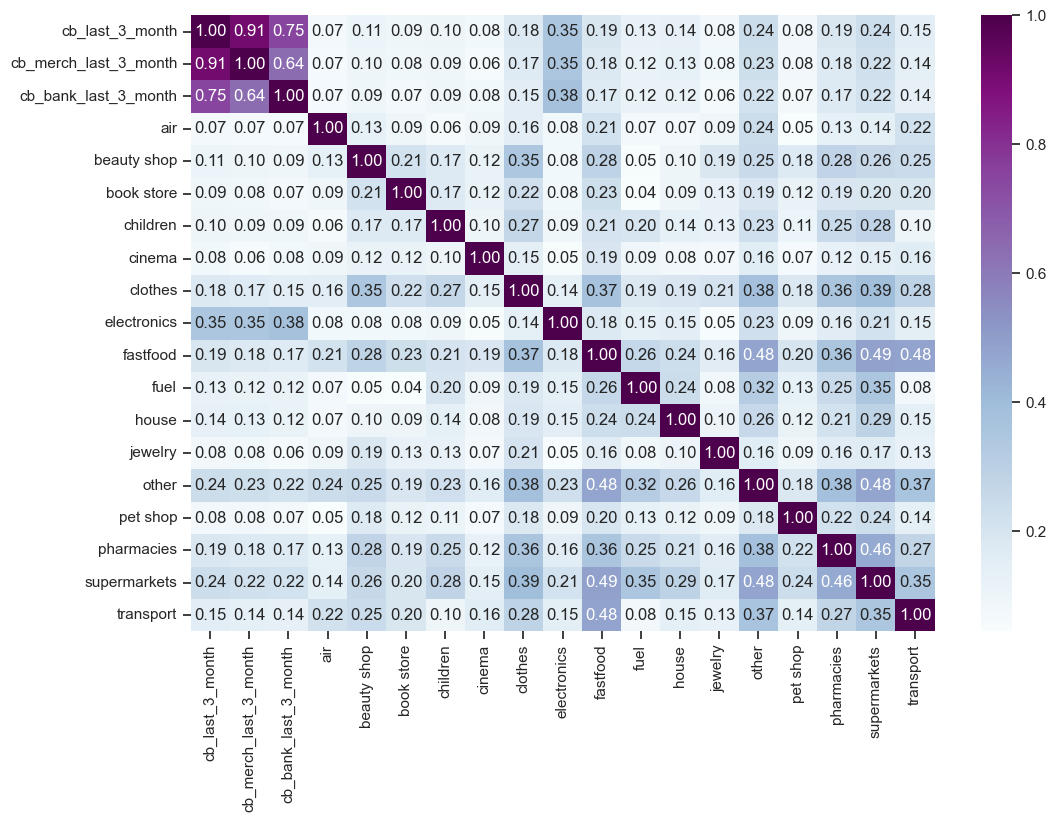

In [18]:
#Создадим датасет с покупками за последние 3 месяца
df_3 = df_all[['cb_last_3_month', 'cb_merch_last_3_month', 'cb_bank_last_3_month', 'air', 'beauty shop', 'book store',
       'children', 'cinema', 'clothes', 'electronics', 'fastfood', 'fuel',
       'house', 'jewelry', 'other', 'pet shop', 'pharmacies', 'supermarkets', 'transport']]
sns.heatmap(df_3.corr(method='kendall'), annot=True, fmt=".2f", linecolor='white', cmap='BuPu')
plt.show()

В большинстве случаев связь слабая, только по категории Электроника наблюдается умеренная связь, причем деление по субъекту не дало значительных различий.

C:\Users\nelli\AppData\Local\Temp\ipykernel_16860\3461758090.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3_all['all_things'] = df_3['air'] + df_3['beauty shop'] + df_3['book store'] + df_3['children'] + df_3['cinema'] + df_3['clothes'] + df_3['electronics'] + df_3['fastfood'] + df_3['fuel']+ df_3['house'] + df_3['jewelry'] + df_3['other'] + df_3['pet shop'] + df_3['pharmacies'] + df_3['supermarkets'] + df_3['transport']


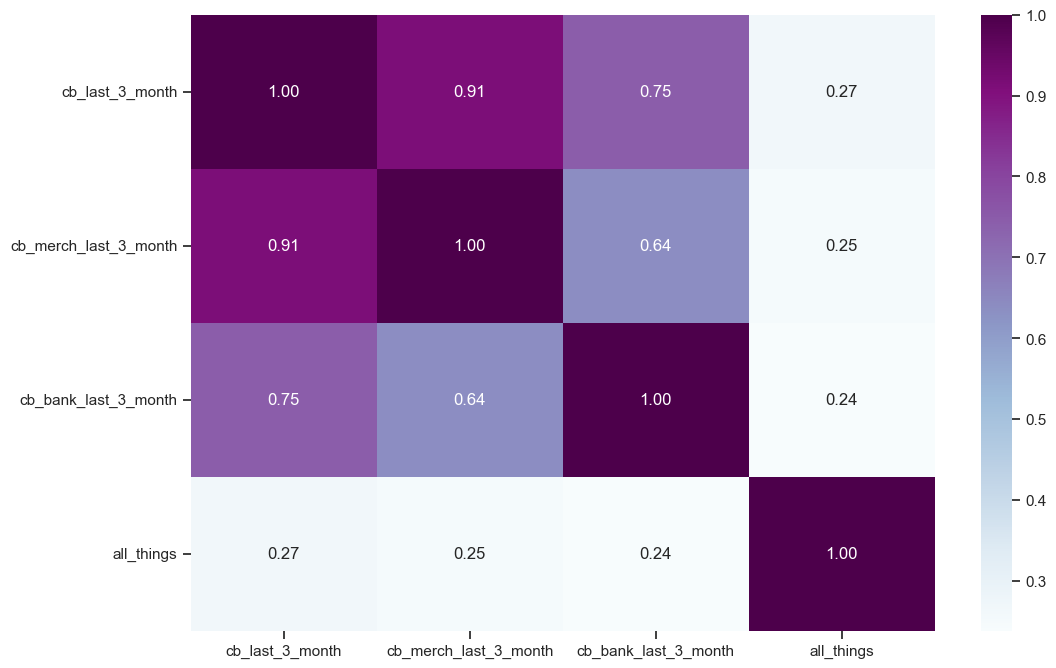

In [19]:
#Отдельно посмотрим сумму всех покупок за последние 3 месяца
df_3_all = df_all[['cb_last_3_month', 'cb_merch_last_3_month', 'cb_bank_last_3_month']]
df_3_all['all_things'] = df_3['air'] + df_3['beauty shop'] + df_3['book store'] + df_3['children'] + df_3['cinema'] + df_3['clothes'] + df_3['electronics'] + df_3['fastfood'] + df_3['fuel']+ df_3['house'] + df_3['jewelry'] + df_3['other'] + df_3['pet shop'] + df_3['pharmacies'] + df_3['supermarkets'] + df_3['transport']
sns.heatmap(df_3_all.corr(method='kendall'), annot=True, fmt=".2f", linecolor='white', cmap='BuPu')
plt.show()

Можно сделать вывод, что связь между суммой покупок в целом за последние три месяца и кэшбэком слабая.

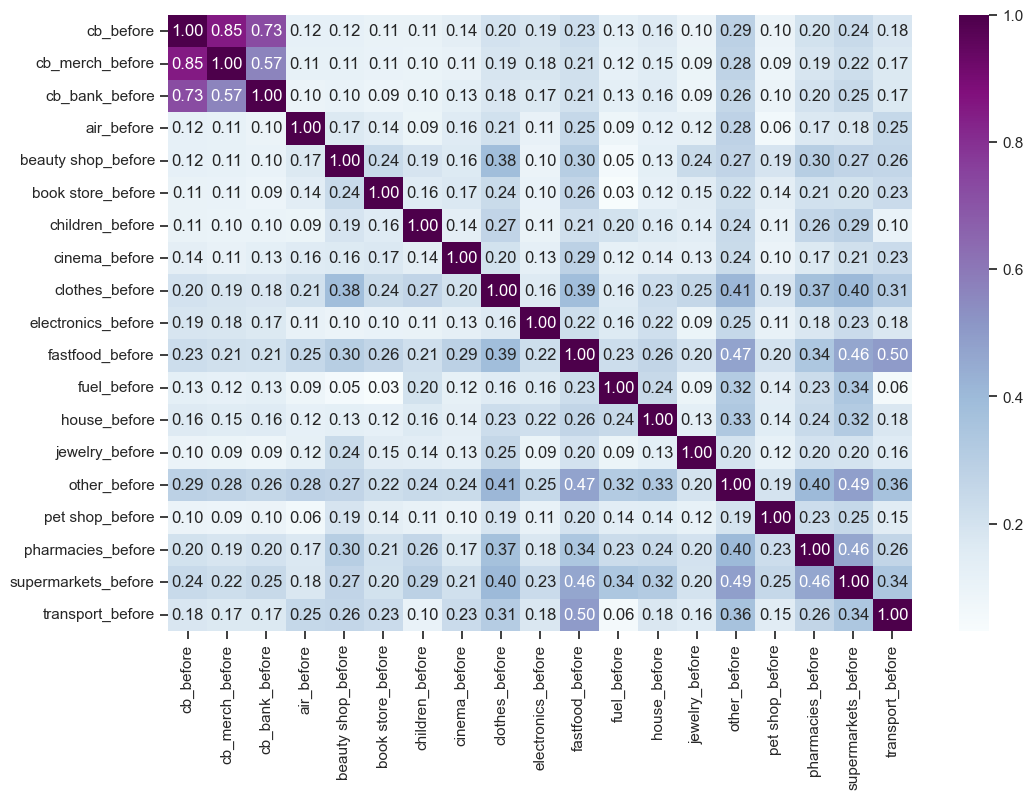

In [20]:
#Создадим датасет с покупками за первые месяцы
df_before = df_all[['cb_before', 'cb_merch_before', 'cb_bank_before', 'air_before', 'beauty shop_before',
       'book store_before', 'children_before', 'cinema_before',
       'clothes_before', 'electronics_before', 'fastfood_before',
       'fuel_before', 'house_before', 'jewelry_before', 'other_before',
       'pet shop_before', 'pharmacies_before', 'supermarkets_before',
       'transport_before']]
sns.heatmap(df_before.corr(method='kendall'), annot=True, fmt=".2f", linecolor='white', cmap='BuPu')
plt.show()

Связь между покупками и кэшбэком слабая по всем категориям.

C:\Users\nelli\AppData\Local\Temp\ipykernel_16860\4094981967.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_before_all['all_things'] = df_before['air_before'] + df_before['beauty shop_before'] + df_before['book store_before'] + df_before['children_before'] + df_before['cinema_before'] + df_before['clothes_before'] + df_before['electronics_before'] + df_before['fastfood_before'] + df_before['fuel_before'] + df_before['house_before'] + df_before['jewelry_before'] + df_before['other_before'] + df_before['pet shop_before'] + df_before['pharmacies_before'] + df_before['supermarkets_before'] + df_before['transport_before']


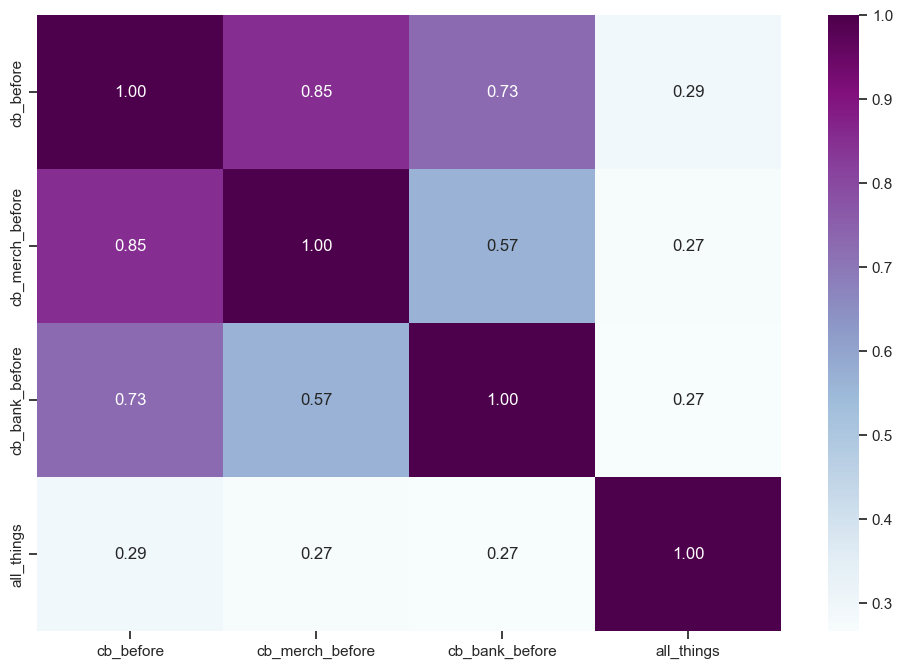

In [21]:
#Отдельно посчитаем сумму всех покупок за первый период
df_before_all = df_all[['cb_before', 'cb_merch_before', 'cb_bank_before']]
df_before_all['all_things'] = df_before['air_before'] + df_before['beauty shop_before'] + df_before['book store_before'] + df_before['children_before'] + df_before['cinema_before'] + df_before['clothes_before'] + df_before['electronics_before'] + df_before['fastfood_before'] + df_before['fuel_before'] + df_before['house_before'] + df_before['jewelry_before'] + df_before['other_before'] + df_before['pet shop_before'] + df_before['pharmacies_before'] + df_before['supermarkets_before'] + df_before['transport_before']
sns.heatmap(df_before_all.corr(method='kendall'), annot=True, fmt=".2f", linecolor='white', cmap='BuPu')
plt.show()

Можно сделать вывод, что связь между суммой покупок за первые месяцы и кэшбэком слабая, как и за последние 3 месяца.

### Задание 3 

3 месяца назад произшло глобальное обновление приложения в т.ч. методики взаимодействия с пользователем. Необходимо оценить эффект обновления.

В случае, когда мы хотим оценить нововведение хорошо подойдет A/B тест. В нашем случае его невозможно использовать, так как новшество уже введено. В качестве метрики мы будем использовать показатель, по которому можно отследить изменение - сумма заказов. Так как большинство заказов оказываются на маленькую сумму, и большая сумма заказов скорее редкость, распределение точно не будет нормальным, и в данном случае целесообразно использовать бакетный тест. Для этого разделим пользователей по бакетам (50000 измерений; 100 бакетов, в каждом бакете по 500 пользователей), далее проводим тест.<br>
#### H0:различия между выборками нет, обновление не играет роли<br>
#### H1: различия между выборками есть, обновление повлияло на изменение суммы заказа

In [22]:
# Добавим столбцы с общей метрикой на до и после обновления без категоризации
bac = pd.DataFrame()
bac['client_id'] = df['client_id']
bac['metric_before'] = df['air_before'] + df['beauty shop_before'] + df['book store_before'] + df['children_before'] + df['cinema_before'] + df['clothes_before'] + df['electronics_before'] + df['fastfood_before'] + df['fuel_before'] + df['house_before'] + df['jewelry_before'] + df['other_before'] + df['pet shop_before'] + df['pharmacies_before'] + df['supermarkets_before'] + df['taxi_before'] + df['transport_before']
bac['metric_after'] = df['air'] + df['beauty shop'] + df['book store'] + df['children'] + df['cinema'] + df['clothes'] + df['electronics'] + df['fastfood'] + df['fuel'] + df['house'] + df['jewelry'] + df['other'] + df['pet shop'] + df['pharmacies'] + df['supermarkets'] + df['taxi'] + df['transport']
bac

,client_id,metric_before,metric_after
0,162353149,16800.0,12832.0
1,666605735,14.0,0.0
2,558610079,12474.0,9775.0
3,769974329,904.0,1164.0
4,350605405,4489.0,7707.0
...,...,...,...
49995,377949465,4196.0,19188.0
49996,299560244,2333.0,3284.0
49997,66958117,1861.0,3785.0
49998,549553108,12949.0,17260.0


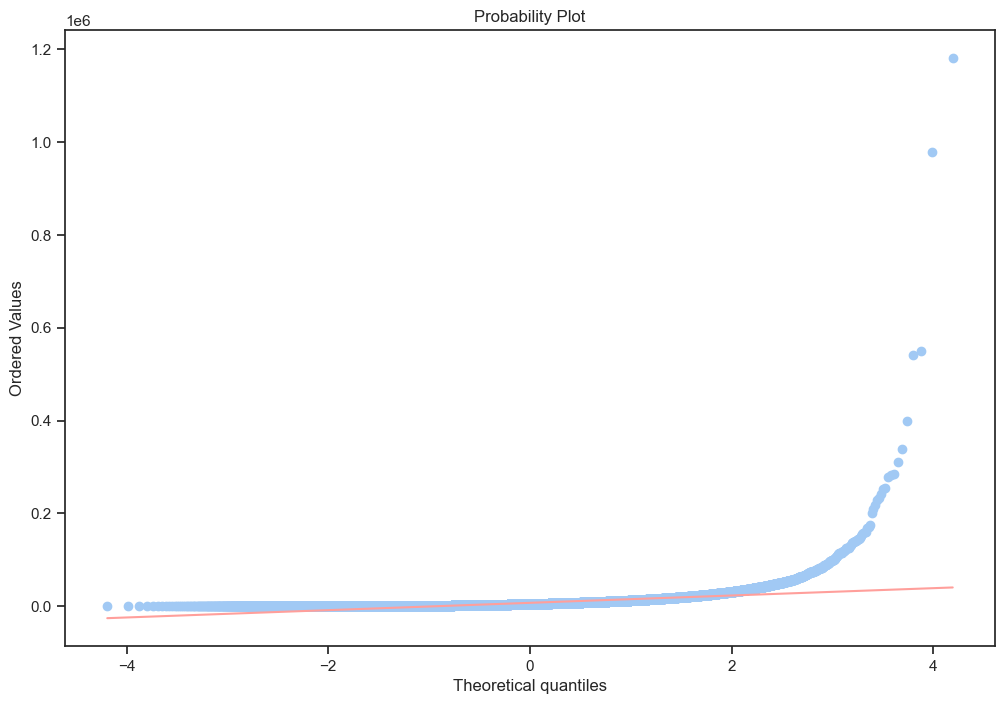

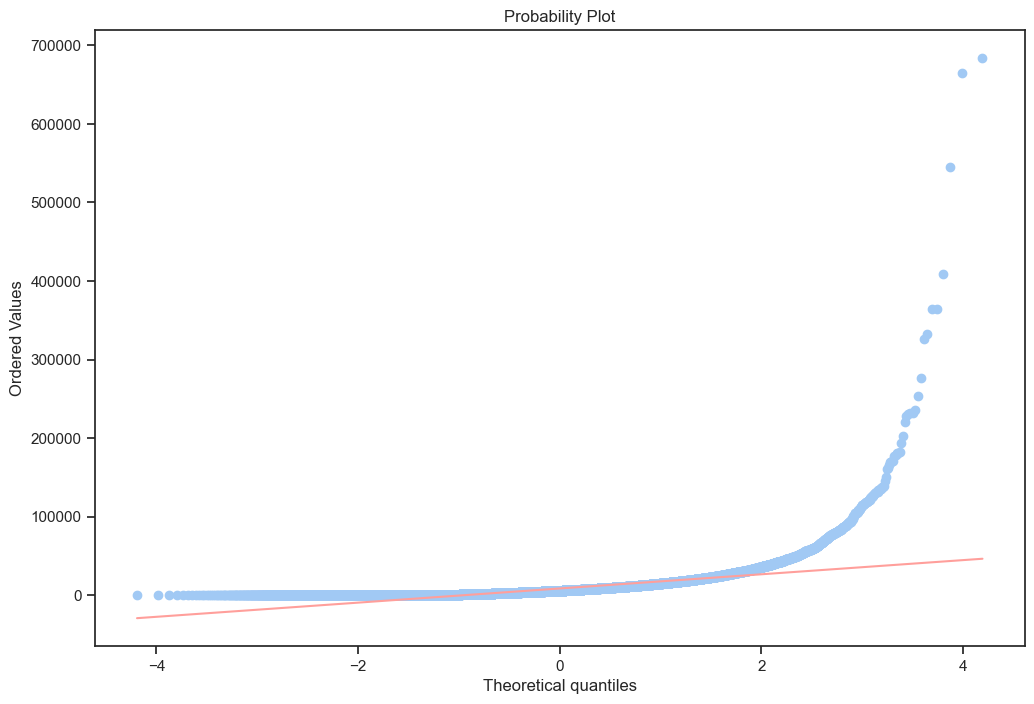

In [23]:
st.probplot(bac['metric_before'], dist='norm', plot=plt)
plt.show()
st.probplot(bac['metric_after'], dist='norm', plot=plt)
plt.show()

In [24]:
# Разделим пользователей по бакетам
bac['group'] = np.repeat(np.arange(1, 101), len(bac) // 100) # повторяем значения номеров групп равное кол-во раз
bac = bac.sample(frac=1).reset_index(drop=True) # перемешиваем данные внутрки групп
bac

,client_id,metric_before,metric_after,group
0,3996205,12789.0,13148.0,81
1,698163293,11876.0,11009.0,83
2,426607840,433.0,1566.0,19
3,726284647,1669.0,2767.0,86
4,734844967,3357.0,5012.0,10
...,...,...,...,...
49995,268157942,21541.0,18092.0,11
49996,248938459,3352.0,2926.0,18
49997,290940817,12807.0,6033.0,70
49998,861049370,1812.0,7847.0,43


In [25]:
alpha = 0.05 # уровень статистической значимости

results = st.mannwhitneyu(bac['metric_before'], bac['metric_after'])

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

p-value: 4.707784732010666e-38
Следует отвергнуть нулевую гипотезу


Распределим выборку по бакетам для получения нормального распределения

In [26]:
# Создадим датасет со средними значениями метрики по каждому бакету
mean_metric = bac.groupby('group')[['metric_before', 'metric_after']].mean().reset_index()
mean_metric

,group,metric_before,metric_after
0,1,7417.160,7938.092
1,2,7365.464,8439.824
2,3,9111.844,10438.328
3,4,7287.712,8664.212
4,5,7880.006,9081.164
...,...,...,...
95,96,7884.764,9618.254
96,97,7375.676,8017.294
97,98,7217.192,8259.348
98,99,7227.598,8656.628


<AxesSubplot:>

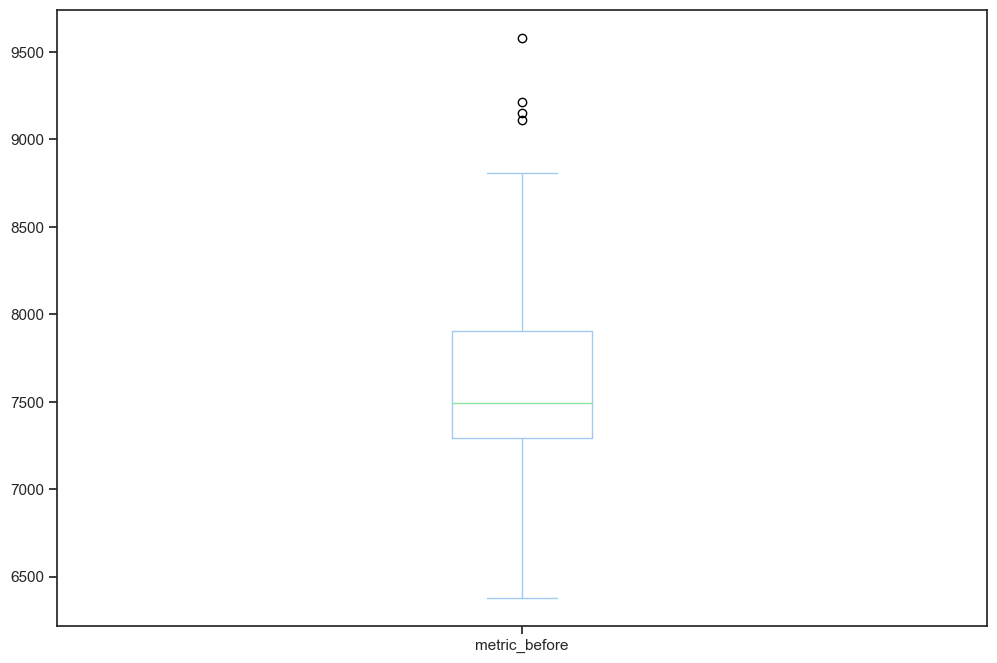

In [27]:
mean_metric['metric_before'].plot.box()

In [28]:
# Удалим выбросы
total_stat = mean_metric.describe()
q3 = total_stat['metric_before']['75%']
q1 = total_stat['metric_before']['25%']
iqr = q3-q1 # межквартильный размах
iqr_min = q1 - 1.5*iqr
iqr_max = q3 + 1.5*iqr
# Удаляем выбросы
mean_metric = mean_metric.drop(mean_metric[mean_metric['metric_before'] >= iqr_max].index)
mean_metric = mean_metric.drop(mean_metric[mean_metric['metric_before'] <= iqr_min].index)
mean_metric

,group,metric_before,metric_after
0,1,7417.160,7938.092
1,2,7365.464,8439.824
3,4,7287.712,8664.212
4,5,7880.006,9081.164
5,6,7561.836,8667.626
...,...,...,...
95,96,7884.764,9618.254
96,97,7375.676,8017.294
97,98,7217.192,8259.348
98,99,7227.598,8656.628


<AxesSubplot:>

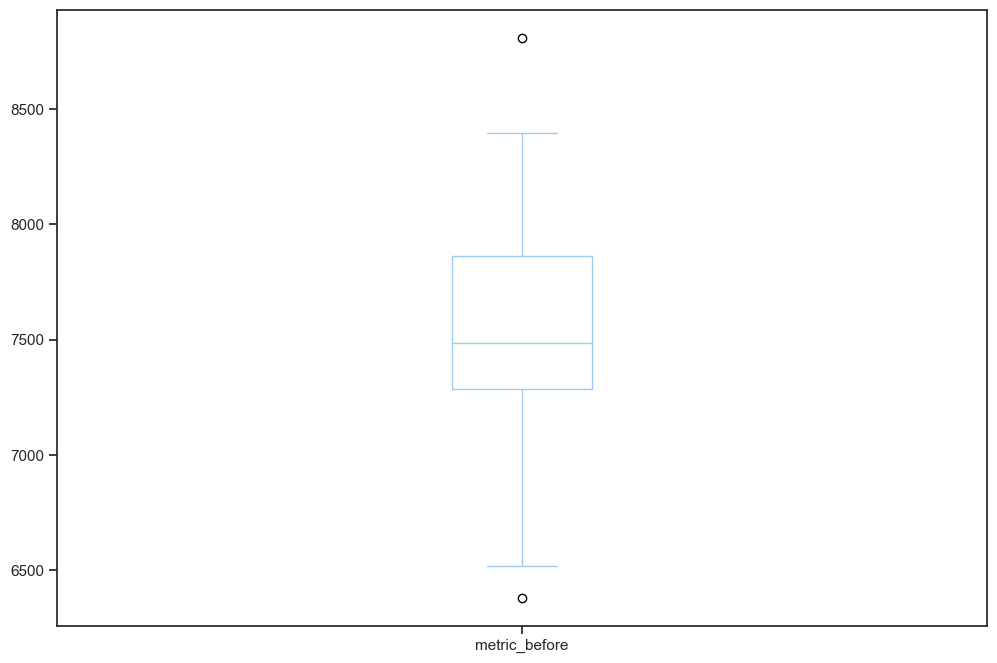

In [29]:
mean_metric['metric_before'].plot.box()

<AxesSubplot:>

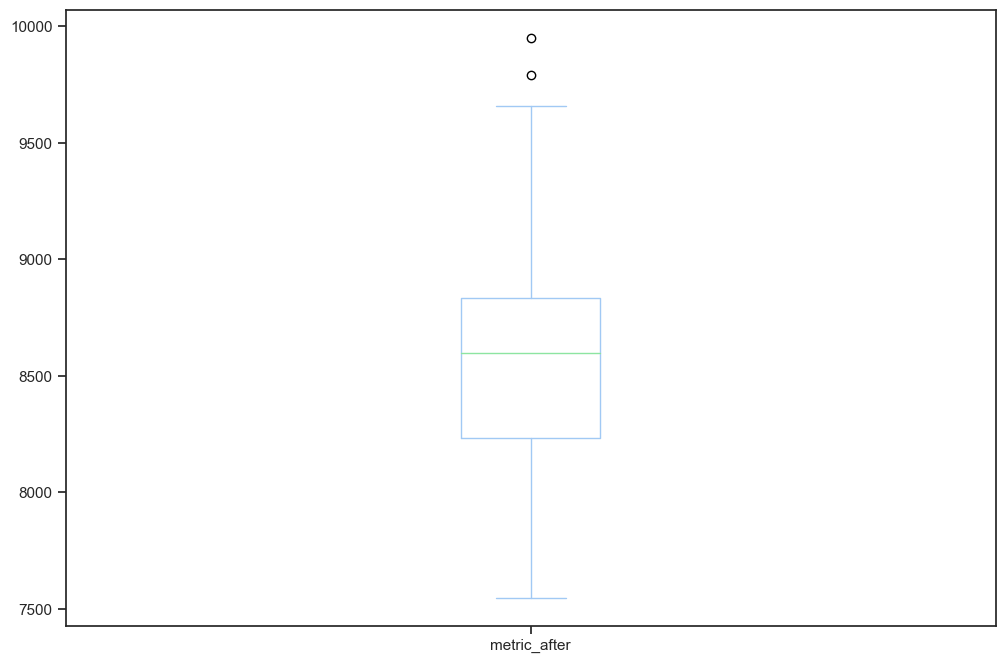

In [30]:
mean_metric['metric_after'].plot.box()

In [31]:
total_stat = mean_metric.describe()
q3 = total_stat['metric_after']['75%']
q1 = total_stat['metric_after']['25%']
iqr = q3-q1 # межквартильный размах
iqr_min = q1 - 1.5*iqr
iqr_max = q3 + 1.5*iqr
# Удаляем выбросы
mean_metric = mean_metric.drop(mean_metric[mean_metric['metric_after'] >= iqr_max].index)
mean_metric = mean_metric.drop(mean_metric[mean_metric['metric_after'] <= iqr_min].index)
mean_metric

,group,metric_before,metric_after
0,1,7417.160,7938.092
1,2,7365.464,8439.824
3,4,7287.712,8664.212
4,5,7880.006,9081.164
5,6,7561.836,8667.626
...,...,...,...
95,96,7884.764,9618.254
96,97,7375.676,8017.294
97,98,7217.192,8259.348
98,99,7227.598,8656.628


<AxesSubplot:>

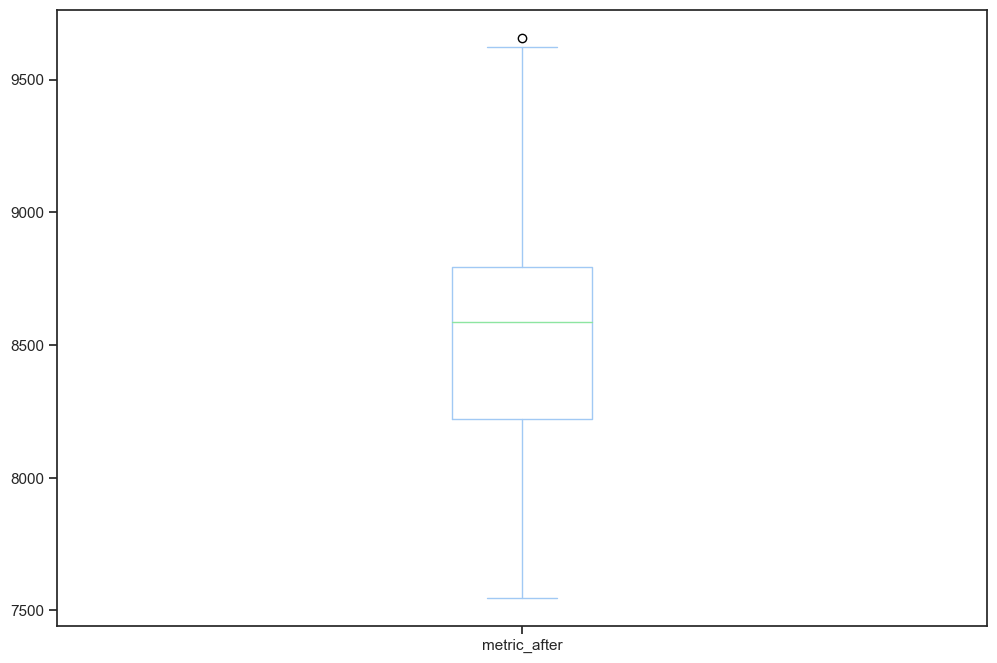

In [32]:
mean_metric['metric_after'].plot.box()

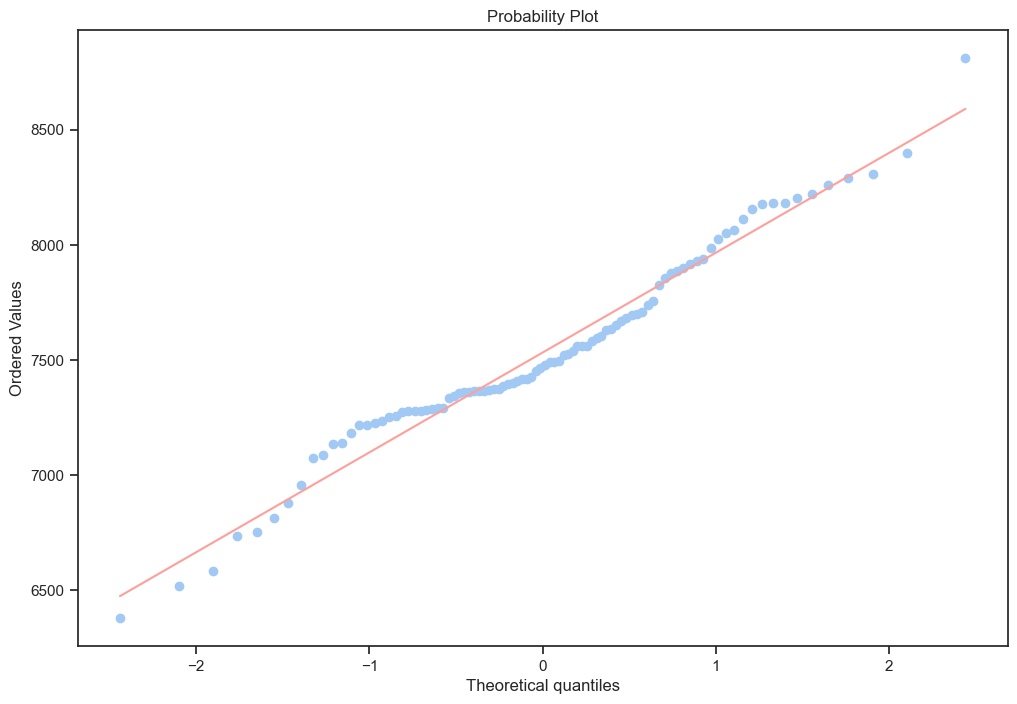

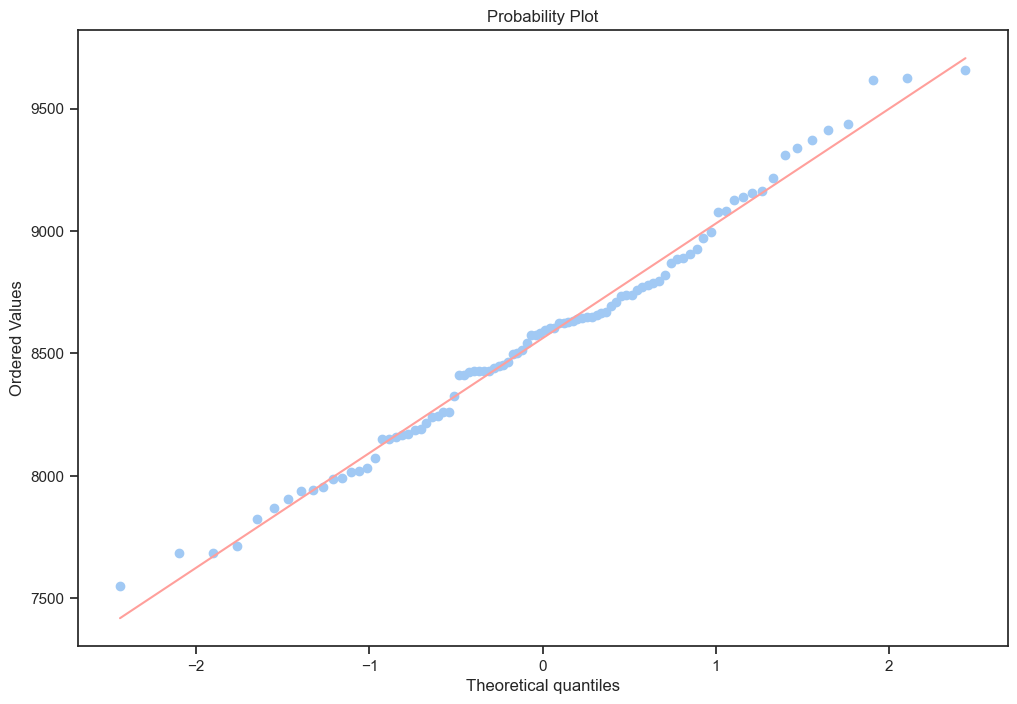

In [33]:
# Посмотрим на распределение сейчас
st.probplot(mean_metric['metric_before'], dist='norm', plot=plt)
plt.show()
st.probplot(mean_metric['metric_after'], dist='norm', plot=plt)
plt.show()

In [34]:
mean_metric['metric_before'].count()

94

In [35]:
mean_metric['metric_after'].count()

94

In [36]:
# Наблюдений меньше 5000 - можем применить тест Шапиро-Уилка
stat, p = st.shapiro(mean_metric['metric_before'])

alpha = 0.05
if p < alpha:
    print(p, 'Отвергаем нулевую гипотезу. Выборка НЕ имеет нормального распределения')
else:
    print(p, 'Не получилось отвергнуть нулевую гипотезу. Выборка имеет нормальное распределение')

0.08686017990112305 Не получилось отвергнуть нулевую гипотезу. Выборка имеет нормальное распределение


In [37]:
stat, p = st.shapiro(mean_metric['metric_after'])

alpha = 0.05
if p < alpha:
    print(p, 'Отвергаем нулевую гипотезу. Выборка НЕ имеет нормального распределения')
else:
    print(p, 'Не получилось отвергнуть нулевую гипотезу. Выборка имеет нормальное распределение')

0.4073050022125244 Не получилось отвергнуть нулевую гипотезу. Выборка имеет нормальное распределение


Тест Шапиро также показывает, что обе выборки распределены нормально

In [38]:
alpha = 0.05 # уровень статистической значимости

results = st.ttest_rel(mean_metric['metric_before'], mean_metric['metric_after'])

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

p-value: 6.21756647706922e-45
Следует отвергнуть нулевую гипотезу


In [39]:
# проверка вручную
mean_before = mean_metric['metric_before'].mean()
mean_after = mean_metric['metric_after'].mean()
s_before = np.std(mean_metric['metric_before'])
s_after = np.std(mean_metric['metric_after'])
n_before = mean_metric['metric_before'].count()
n_after = mean_metric['metric_after'].count()
ESE = np.sqrt(s_before ** 2 / n_before + s_after ** 2 / n_after)
t = (mean_before - mean_after) / ESE
ESE_before = s_before ** 2 / n_before
ESE_after = s_after ** 2 / n_after
df = (ESE_before + ESE_after) ** 2 / (ESE_before ** 2 / n_before - 1 + ESE_after ** 2 / n_after - 1)
print(t, df)

-15.817896252510868 187.08111471338208


Для данных t и df p-value < 0,00001, так как a=0.05, мы отклоняем нулевую гипотезу и говорим, что после обновления есть изменения и это не просто случайный фактор.

### Задание 4

Выдвините собственную гипотезу на основе имеющихся данных.

H0: обновление не повлияло на общий кэшбэк<br>
Н1: обновление повлияло на общий кэшбэк

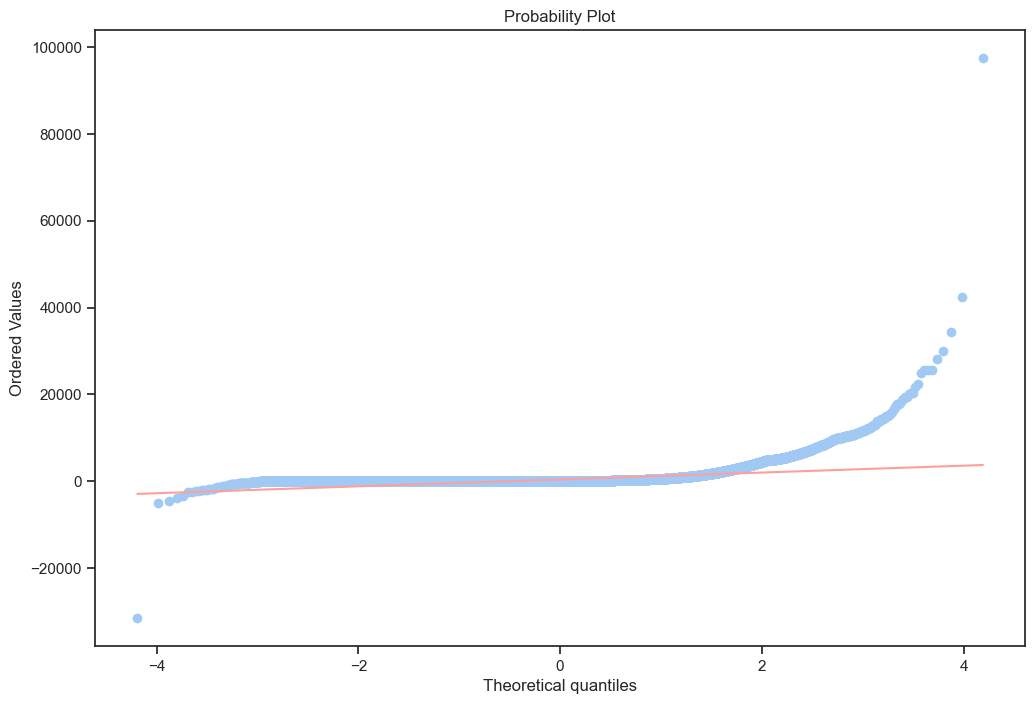

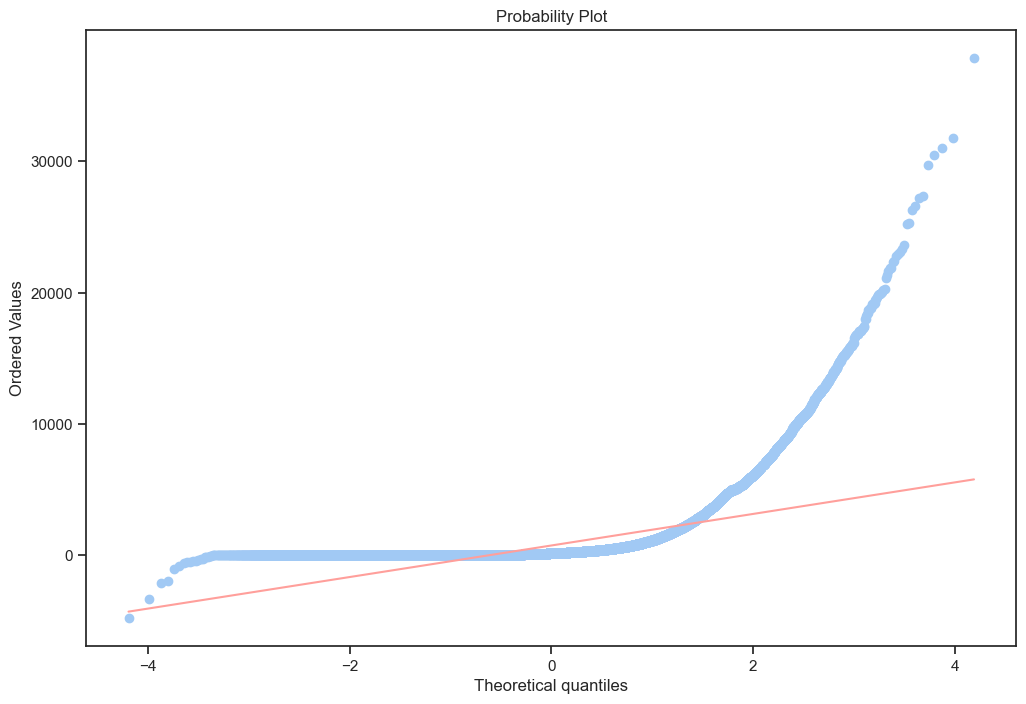

In [40]:
st.probplot(df_copy['cb_last_3_month'], dist='norm', plot=plt)
plt.show()
st.probplot(df_copy['cb_before'], dist='norm', plot=plt)
plt.show()

Как и ожидалось, распределение не является нормальным. 

Распределение не является нормальным. Используем тест Манна-Уитни

In [43]:
aplha = 0.05
results = st.mannwhitneyu(df_copy['cb_last_3_month'], df_copy['cb_before'])
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('Отклоняем нулевую гипотезу')
else:
    print('Нет оснований отклонить нулевую гипотезу')

p-value: 0.0
Отклоняем нулевую гипотезу


Делаем вывод, что нужно отклонить нулевую, и получается, что обновление повлияло на кэшбэк.

In [45]:
bac_1 = df_copy[['cb_last_3_month', 'cb_before']]
bac_1['group'] = np.repeat(np.arange(1, 101), len(bac_1) // 100) # повторяем значения номеров групп равное кол-во раз
bac_1 = bac_1.sample(frac=1).reset_index(drop=True) # перемешиваем данные внутрки групп
bac_1

C:\Users\nelli\AppData\Local\Temp\ipykernel_16860\3852503998.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bac_1['group'] = np.repeat(np.arange(1, 101), len(bac_1) // 100) # повторяем значения номеров групп равное кол-во раз


,cb_last_3_month,cb_before,group
0,0.0,1719.0,59
1,840.0,158.0,14
2,84.0,789.0,71
3,111.0,48.0,36
4,137.0,0.0,16
...,...,...,...
49995,2.0,6860.0,84
49996,0.0,73.0,77
49997,44.0,605.0,27
49998,0.0,12.0,70


In [46]:
mean_metric = bac_1.groupby('group')[['cb_last_3_month', 'cb_before']].mean().reset_index()
mean_metric

,group,cb_last_3_month,cb_before
0,1,475.962,782.022
1,2,414.540,745.420
2,3,467.716,886.928
3,4,375.942,713.024
4,5,423.058,720.048
...,...,...,...
95,96,380.754,758.480
96,97,383.450,603.452
97,98,390.394,634.290
98,99,437.936,658.376


In [47]:
# Удалим выбросы
total_stat = mean_metric.describe()
q3 = total_stat['cb_last_3_month']['75%']
q1 = total_stat['cb_last_3_month']['25%']
iqr = q3-q1 # межквартильный размах
iqr_min = q1 - 1.5*iqr
iqr_max = q3 + 1.5*iqr
# Удаляем выбросы
mean_metric = mean_metric.drop(mean_metric[mean_metric['cb_last_3_month'] >= iqr_max].index)
mean_metric = mean_metric.drop(mean_metric[mean_metric['cb_last_3_month'] <= iqr_min].index)
mean_metric

,group,cb_last_3_month,cb_before
0,1,475.962,782.022
1,2,414.540,745.420
2,3,467.716,886.928
3,4,375.942,713.024
4,5,423.058,720.048
...,...,...,...
95,96,380.754,758.480
96,97,383.450,603.452
97,98,390.394,634.290
98,99,437.936,658.376


In [48]:
total_stat = mean_metric.describe()
q3 = total_stat['cb_before']['75%']
q1 = total_stat['cb_before']['25%']
iqr = q3-q1 # межквартильный размах
iqr_min = q1 - 1.5*iqr
iqr_max = q3 + 1.5*iqr
# Удаляем выбросы
mean_metric = mean_metric.drop(mean_metric[mean_metric['cb_before'] >= iqr_max].index)
mean_metric = mean_metric.drop(mean_metric[mean_metric['cb_before'] <= iqr_min].index)
mean_metric

,group,cb_last_3_month,cb_before
0,1,475.962,782.022
1,2,414.540,745.420
2,3,467.716,886.928
3,4,375.942,713.024
4,5,423.058,720.048
...,...,...,...
95,96,380.754,758.480
96,97,383.450,603.452
97,98,390.394,634.290
98,99,437.936,658.376


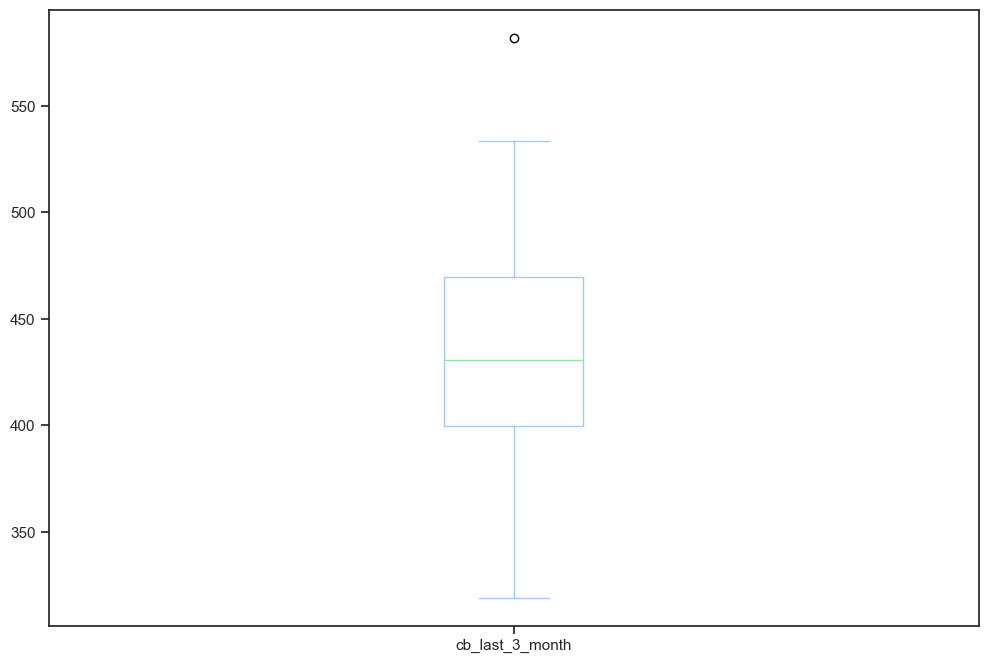

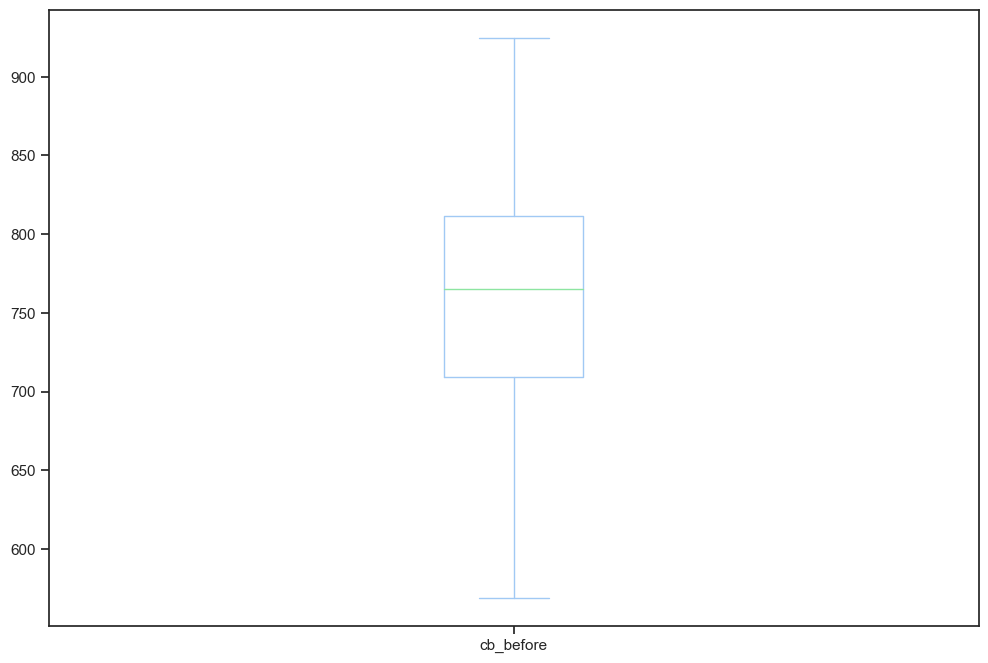

In [49]:
mean_metric['cb_last_3_month'].plot.box()
plt.show()
mean_metric['cb_before'].plot.box()
plt.show()

In [50]:
mean_metric['cb_last_3_month'].count()

97

In [51]:
mean_metric['cb_before'].count()

97

In [52]:
# Наблюдений меньше 5000 - можем применить тест Шапиро-Уилка
stat, p = st.shapiro(mean_metric['cb_last_3_month'])

alpha = 0.05
if p < alpha:
    print(p, 'Отвергаем нулевую гипотезу. Выборка НЕ имеет нормального распределения')
else:
    print(p, 'Не получилось отвергнуть нулевую гипотезу. Выборка имеет нормальное распределение')

0.8287481069564819 Не получилось отвергнуть нулевую гипотезу. Выборка имеет нормальное распределение


In [53]:
stat, p = st.shapiro(mean_metric['cb_before'])

alpha = 0.05
if p < alpha:
    print(p, 'Отвергаем нулевую гипотезу. Выборка НЕ имеет нормального распределения')
else:
    print(p, 'Не получилось отвергнуть нулевую гипотезу. Выборка имеет нормальное распределение')

0.824847400188446 Не получилось отвергнуть нулевую гипотезу. Выборка имеет нормальное распределение


In [54]:
alpha = 0.05 # уровень статистической значимости

results = st.ttest_rel(mean_metric['cb_last_3_month'], mean_metric['cb_before'])

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Следует отвергнуть нулевую гипотезу') 
else:
    print('Не удалось отвергнуть нулевую гипотезу') 

p-value: 6.6481375590152084e-65
Следует отвергнуть нулевую гипотезу
